<a href="https://colab.research.google.com/github/ST10055763/PDAN8412-ICE-4/blob/main/LSTM_IMDB_Activity_(11_08).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM with Sentiment Analysis

## Activity 2 - IMDB

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

NUM_WORDS   = 40000 # 20000
MAX_LEN     = 300   # 200
EMBED_DIM   = 64
LSTM_UNITS  = 64
DENSE_UNITS = 128
DROP_EMB    = 0.2
DROP_DENSE  = 0.3
BATCH_SIZE  = 128
EPOCHS      = 20

In [3]:
# Load the dataset
# Split into train and test
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

print("Train size:", len(x_train), " Test size:", len(x_test))
print("Example (first review, first 20 tokens):", x_train[0][:20])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train size: 25000  Test size: 25000
Example (first review, first 20 tokens): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


In [4]:
# Pad the data - why do we need to do this?
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding="post", truncating="post")
x_test  = pad_sequences(x_test,  maxlen=MAX_LEN, padding="post", truncating="post")

print("Padded shapes -> train:", x_train.shape, " test:", x_test.shape)

Padded shapes -> train: (25000, 300)  test: (25000, 300)


In [5]:
# Create and compile your model (this is different to what we did for timeseries)
def build_lstm():
    model = Sequential([
        Input(shape=(MAX_LEN,), dtype="int32"),
        Embedding(NUM_WORDS, EMBED_DIM, mask_zero=True),
        Dropout(DROP_EMB),
        LSTM(LSTM_UNITS),
        Dense(DENSE_UNITS, activation="relu"),
        Dropout(DROP_DENSE),
        Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def build_bilstm():
    model = Sequential([
        Input(shape=(MAX_LEN,), dtype="int32"),
        Embedding(NUM_WORDS, EMBED_DIM, mask_zero=True),
        Dropout(DROP_EMB),
        Bidirectional(LSTM(LSTM_UNITS)),
        Dense(DENSE_UNITS, activation="relu"),
        Dropout(DROP_DENSE),
        Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [6]:
early = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, min_lr=1e-5, verbose=1)

In [7]:
lstm = build_lstm()
bilstm = build_bilstm()

hist_lstm = lstm.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early, rlrop],
    verbose=1
)
test_loss_l, test_acc_l = lstm.evaluate(x_test, y_test, verbose=0)
print(f"[LSTM]    Test acc: {test_acc_l:.4f} | loss: {test_loss_l:.4f}")

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 130s 711ms/step - accuracy: 0.6192 - loss: 0.6159 - val_accuracy: 0.8716 - val_loss: 0.3234 - learning_rate: 0.0010
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8984 - loss: 0.2614
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
176/176 ━━━━━━━━━━━━━━━━━━━━ 117s 665ms/step - accuracy: 0.8985 - loss: 0.2613 - val_accuracy: 0.8672 - val_loss: 0.3819 - learning_rate: 0.0010
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.9472 - loss: 0.1471
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
176/176 ━━━━━━━━━━━━━━━━━━━━ 143s 672ms/step - accuracy: 0.9473 - loss: 0.1470 - val_accuracy: 0.8720 - val_loss: 0.3438 - learning_rate: 5.0000e-04
[LSTM]    Test acc: 0.8543 | loss: 0.3544


In [8]:
# Fit the model
hist_bilstm = bilstm.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early, rlrop],
    verbose=1
)
test_loss_b, test_acc_b = bilstm.evaluate(x_test, y_test, verbose=0)
print(f"[BiLSTM]  Test acc: {test_acc_b:.4f} | loss: {test_loss_b:.4f}")

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.6857 - loss: 0.5506 - val_accuracy: 0.8780 - val_loss: 0.3006 - learning_rate: 0.0010
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9173 - loss: 0.2144
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
176/176 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9174 - loss: 0.2143 - val_accuracy: 0.8724 - val_loss: 0.3562 - learning_rate: 0.0010
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9600 - loss: 0.1167
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
176/176 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.9601 - loss: 0.1165 - val_accuracy: 0.8752 - val_loss: 0.3571 - learning_rate: 5.0000e-04
[BiLSTM]  Test acc: 0.8675 | loss: 0.3186


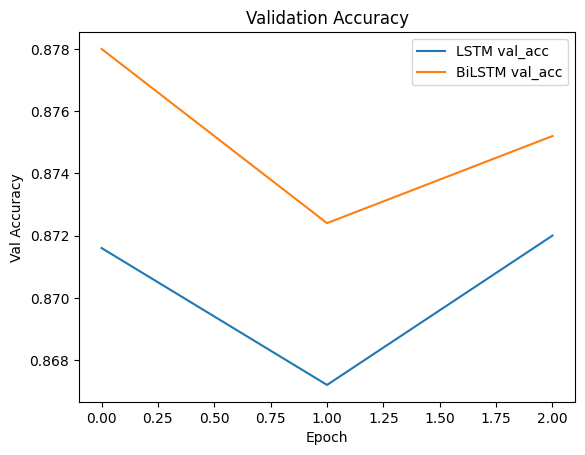

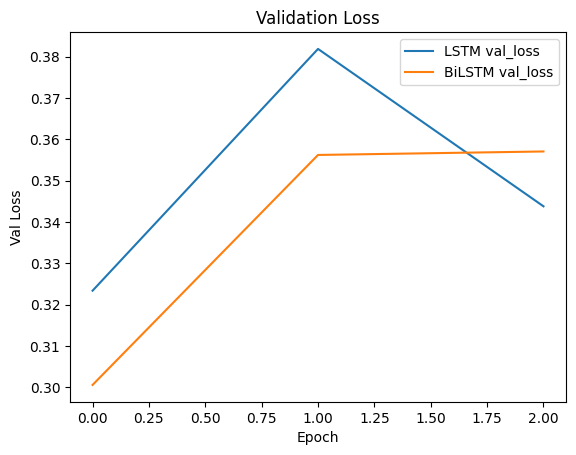

In [9]:
# Explore the loss and accuracy - how do you interpret this?
plt.figure()
plt.plot(hist_lstm.history["val_accuracy"], label="LSTM val_acc")
plt.plot(hist_bilstm.history["val_accuracy"], label="BiLSTM val_acc")
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy"); plt.title("Validation Accuracy"); plt.legend()

plt.figure()
plt.plot(hist_lstm.history["val_loss"], label="LSTM val_loss")
plt.plot(hist_bilstm.history["val_loss"], label="BiLSTM val_loss")
plt.xlabel("Epoch"); plt.ylabel("Val Loss"); plt.title("Validation Loss"); plt.legend()
plt.show()

In [10]:
# Make predictions using known and new data.
word_index = imdb.get_word_index()
index_from = 3

def encode_text(text, num_words=NUM_WORDS, max_len=MAX_LEN):
    tokens = text.lower().split()
    seq = []
    for w in tokens:
        idx = word_index.get(w)
        if idx is None:
            idx = 2
        else:
            idx += index_from
        if idx >= num_words:
            idx = 2
        seq.append(idx)
    return pad_sequences([seq], maxlen=max_len, padding="post", truncating="post")

for s in [
    "this movie was wonderful with brilliant acting",
    "terrible film boring plot and awful dialogue"
]:
  print(s, "->", encode_text(s)[0][:15])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
this movie was wonderful with brilliant acting -> [ 14  20  16 389  19 530 116   0   0   0   0   0   0   0   0]
terrible film boring plot and awful dialogue -> [394  22 357 114   5 373 414   0   0   0   0   0   0   0   0]


In [11]:
import gradio as gr

models = {
    "LSTM": lstm,
    "BiLSTM": bilstm
}

def predict_sentiment(text, model_name):
    if not text or not text.strip():
        return "Please enter text.", 0.0
    x = encode_text(text)
    prob = float(models[model_name].predict(x, verbose=0)[0][0])
    label = "Positive" if prob > 0.5 else "Negative"
    return label, prob

with gr.Blocks(title="IMDB Sentiment (LSTM vs BiLSTM)") as demo:
    gr.Markdown("# IMDB Sentiment\nCompare LSTM vs Bidirectional LSTM")
    with gr.Row():
        model_dd = gr.Dropdown(choices=["LSTM", "BiLSTM"], value="BiLSTM", label="Model")
    txt = gr.Textbox(lines=3, label="Enter a review")
    btn = gr.Button("Predict")
    out_label = gr.Label(label="Prediction")
    out_prob = gr.Number(label="Positive probability", precision=4)
    btn.click(fn=predict_sentiment, inputs=[txt, model_dd], outputs=[out_label, out_prob])

demo.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>